# SVM Approch

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline


#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.svm import SVC


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

### PreProcess


In [4]:
names = ['wifi 1', 'wifi 2', 'wifi 3', 'wifi 4', 'wifi 5', 'wifi 6', 'wifi 7', 'room']
df= pd.read_csv('../wifi_localization.txt',names=names,sep='\t')
df

,wifi 1,wifi 2,wifi 3,wifi 4,wifi 5,wifi 6,wifi 7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


#### Clean and Engeering Data

In [5]:
X = df.drop(['room'],axis=1)
y=df['room']

#### Split Data in Train/Test for X and y


In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1099, stratify=y)


### Model

In [8]:
svc = SVC()
pipe = Pipeline([('svc',svc)])

#### Create Model(s)

In [9]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [10]:
#hyp param value
kernel = ['linear', 'poly', 'rbf', 'sigmoid', ]
degree = list(range(2,7))
gamma =['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']

In [11]:
hyp_param = {
    'svc__kernel':kernel,
    'svc__degree':degree,
    'svc__gamma':gamma,
    'svc__decision_function_shape':decision_function_shape,
}

In [21]:
fullmodel = GridSearchCV(
    estimator=pipe,
    param_grid=hyp_param,
    scoring='accuracy',
    cv=5,
    verbose = 2
)

#### Train Model

In [22]:
fullmodel.fit(X_train,y_train)

Fitting 7 folds for each of 80 candidates, totalling 560 fits
[CV] END svc__decision_function_shape=ovo, svc__degree=2, svc__gamma=scale, svc__kernel=linear; total time=   0.1s
[CV] END svc__decision_function_shape=ovo, svc__degree=2, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=2, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=2, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=2, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=2, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=2, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=2, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__decisi

GridSearchCV(cv=7, estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__degree': [2, 3, 4, 5, 6],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

### Evaluate model

#### Test On data

In [23]:
y_pred = fullmodel.predict(X_test)

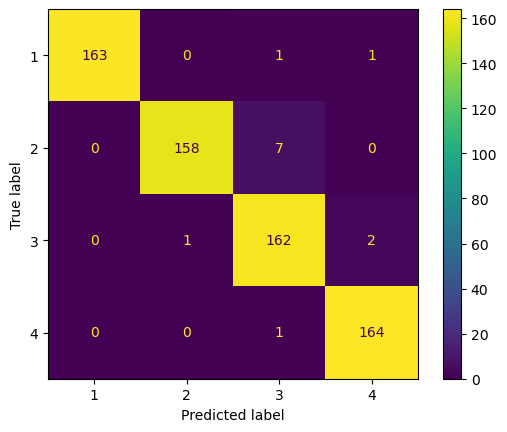

In [24]:
ConfusionMatrixDisplay(
    confusion_matrix(y_true=y_test,
                    y_pred=y_pred),
    display_labels=fullmodel.classes_
).plot()

In [25]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       165
           2       0.99      0.96      0.98       165
           3       0.95      0.98      0.96       165
           4       0.98      0.99      0.99       165

    accuracy                           0.98       660
   macro avg       0.98      0.98      0.98       660
weighted avg       0.98      0.98      0.98       660



### Final Model(s)


In [31]:
fullmodel.best_estimator_.get_params()

{'memory': None,
 'steps': [('svc',
   SVC(decision_function_shape='ovo', degree=2, kernel='poly'))],
 'verbose': False,
 'svc': SVC(decision_function_shape='ovo', degree=2, kernel='poly'),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovo',
 'svc__degree': 2,
 'svc__gamma': 'scale',
 'svc__kernel': 'poly',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

#### Train on all Data 

In [46]:
final_model = SVC( C= 1.0,
 break_ties= False,
 cache_size= 200,
 class_weight= None,
 decision_function_shape= 'ovo',
 degree= 2,
 gamma= 'scale',
 kernel= 'poly',
 max_iter= -1,
 probability= False,
 random_state= None,
 shrinking= True,
 tol= 0.001,
 verbose= False)

In [47]:
final_model.fit(X,y)

SVC(decision_function_shape='ovo', degree=2, kernel='poly')

#### Save with joblib

In [48]:
import joblib
joblib.dump(value=final_model,filename='svc.pkl')

['svc.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
